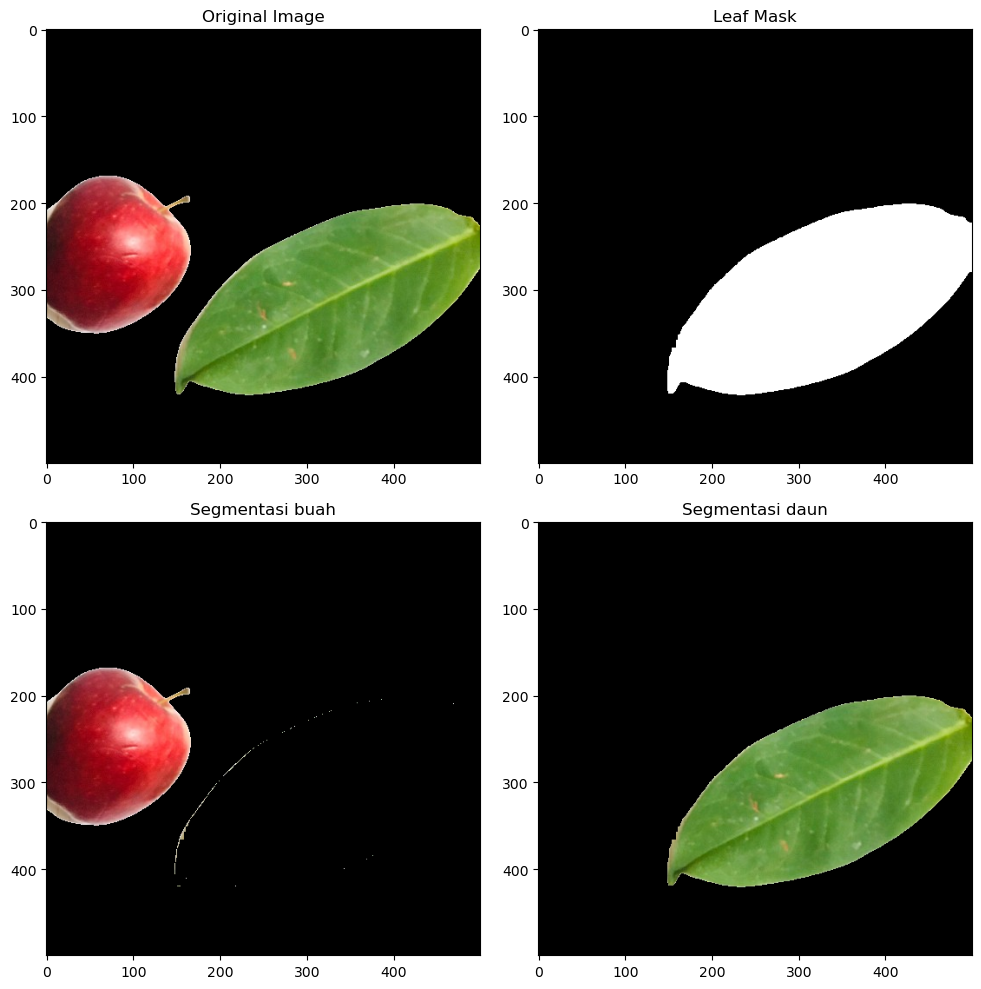

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_leaves(image_path):
    # Load image
    original_image = cv2.imread(image_path)
    if original_image is None:
        print(f"Cannot read image at {image_path}")
        return

    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Define range of green color in HSV
    lower_green = np.array([25, 40, 50])
    upper_green = np.array([95, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Apply morphology operations to remove small noise
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Find contours of objects in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask and draw contours on it
    leaf_mask = np.zeros_like(original_image)
    cv2.drawContours(leaf_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Bitwise AND operation between original image and leaf mask
    segmented_leaves = cv2.bitwise_and(original_image, leaf_mask)

    # Invert the mask to get fruit mask
    fruit_mask = cv2.bitwise_not(leaf_mask)

    # Segment fruit from original image
    segmented_fruit = cv2.bitwise_and(original_image, fruit_mask)

    # Plotting using matplotlib
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Original Image')

    axs[0, 1].imshow(cv2.cvtColor(leaf_mask, cv2.COLOR_BGR2RGB))
    axs[0, 1].set_title('Leaf Mask')

    axs[1, 1].imshow(cv2.cvtColor(segmented_leaves, cv2.COLOR_BGR2RGB))
    axs[1, 1].set_title('Segmentasi daun')

    axs[1, 0].imshow(cv2.cvtColor(segmented_fruit, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Segmentasi buah')

    

    plt.tight_layout()
    plt.show()

# Example usage:
image_path = 'buahapel.png'  # Replace with your image path
detect_leaves(image_path)